<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 184.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 158.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 152.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 158.2 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


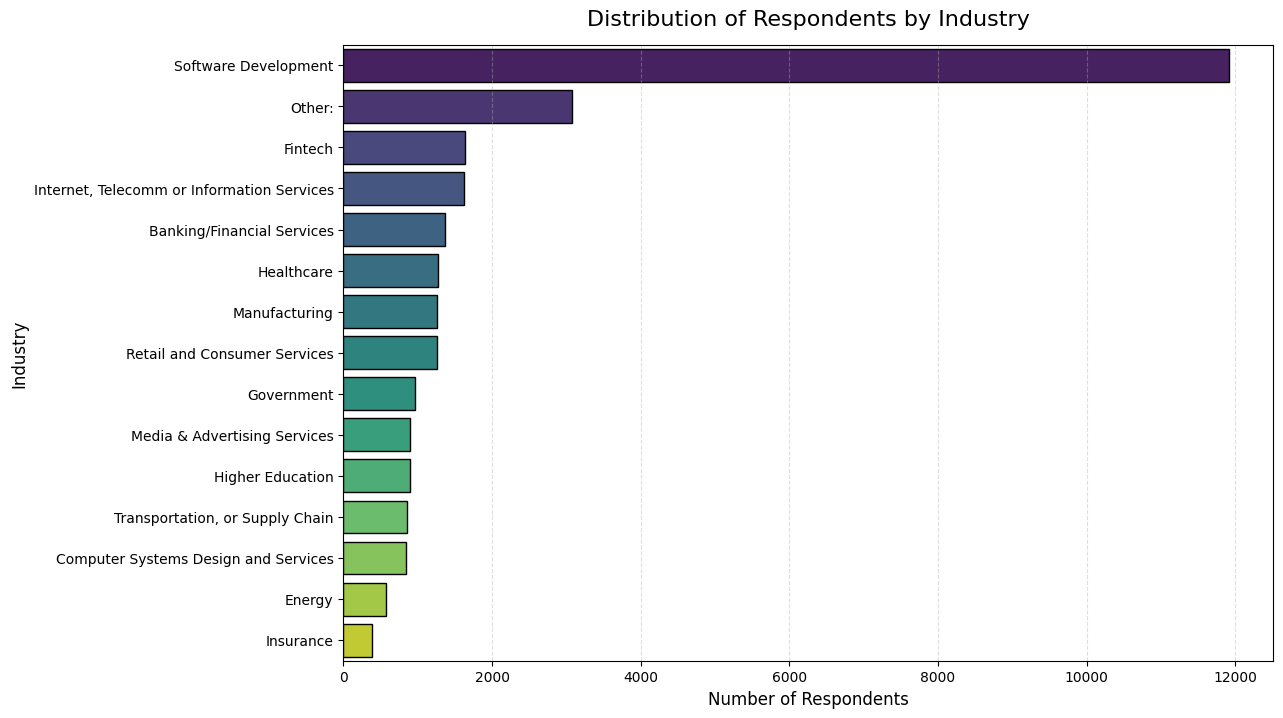

Top 5 Industries by Respondent Count:
Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Name: count, dtype: int64


In [4]:
# 1. Calculate the frequency of each industry
industry_counts = df['Industry'].value_counts()

# 2. Plotting the distribution
plt.figure(figsize=(12, 8))
sns.barplot(
    x=industry_counts.values,
    y=industry_counts.index,
    hue=industry_counts.index,
    palette='viridis',
    edgecolor='black',
    legend=False
)

# 3. Customizing the plot
plt.title('Distribution of Respondents by Industry', fontsize=16, pad = 14)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# plt.tight_layout()
plt.show()

# Display the exact counts for the top 5 industries
print("Top 5 Industries by Respondent Count:")
print(industry_counts.head(5))


### Interpretation
The chart shows a sharply uneven distribution across industries, with participation dominated by a small number of tech‑centric sectors.

>Software Development stands far ahead of every other category, indicating that most respondents come from core engineering and programming roles. “Other” and Fintech form the next tier, suggesting a mix of adjacent digital or emerging technology fields. Industries such as Healthcare, Manufacturing, Retail, Government, Education, and Energy appear with much smaller counts, showing that the dataset is heavily skewed toward technology‑oriented respondents rather than a broad cross‑industry sample.

This imbalance matters for later analysis because any insights drawn from the dataset will primarily reflect the experiences and patterns of workers in software and digital industries, not the wider labor market.

In [19]:
# # Plot the Distribution of Industry

# plt.figure(figsize=(14, 7))

# df['Industry'].value_counts().plot(
#     kind='bar',
#     color='skyblue',
#     edgecolor='black'
# )

# plt.title('Distribution of Respondents by Industry', fontsize=16, pad=15)
# plt.xlabel('Industry', fontsize=12)
# plt.ylabel('Number of Respondents', fontsize=12)

# plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y', linestyle='--', alpha=0.4)

# plt.tight_layout()
# plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [8]:
# Identify High Compensation Outliers

# Keep only valid numeric values
comp = df['ConvertedCompYearly'].dropna()

# Basic statistics
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print("Mean yearly compensation:", mean_comp)
print("Median yearly compensation:", median_comp)
print("Standard deviation:", std_comp)

# Outlier threshold (3 standard deviations above mean)
threshold = mean_comp + 3 * std_comp
print("\nOutlier threshold:", threshold)

# Identify outliers
outliers = df[df['ConvertedCompYearly'] > threshold]

# # Percentage of dataset that are outliers
# percentage_outliers = (len(outliers) / len(df)) * 100
# print(f"Percentage of Dataset as Outliers: {percentage_outliers:.2f}%")

print(f"Percentage of Dataset as Outliers: {(len(outliers) / len(df)) * 100:.2f}%")
print("Number of high compensation outliers:", len(outliers))
print("\n---OUTIERS---\n")
outliers.head()


Mean yearly compensation: 86155.28726264134
Median yearly compensation: 65000.0
Standard deviation: 186756.97308629754

Outlier threshold: 646426.206521534
Percentage of Dataset as Outliers: 0.14%
Number of high compensation outliers: 89

---OUTIERS---



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,40.0,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0
1932,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,10.0,15.0,15.0,0.0,15.0,Appropriate in length,Easy,945000.0,2.0
2171,2172,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,20.0,10.0,20.0,25.0,0.0,0.0,Appropriate in length,Easy,750000.0,8.0
2187,2188,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,2000000.0,NaN


### Takeaway
The summary shows a compensation distribution with a strong right‑tail, where most respondents earn within a typical range but a very small fraction report extremely high salaries.

>The mean is much higher than the median, which signals skew caused by a few very large values. The standard deviation is also large, reinforcing that compensation varies widely across respondents. Using the threshold of three standard deviations above the mean identifies only a tiny portion of the dataset—about 0.14%—as unusually high earners. These 89 records sit far beyond the typical range and function as statistical outliers that can distort averages and influence further analysis if not handled carefully.

In [32]:
# # 1. Calculate basic statistics for ConvertedCompYearly
# # Note: skipna=True is default, which ignores missing values
# mean_comp = df['ConvertedCompYearly'].mean()
# median_comp = df['ConvertedCompYearly'].median()
# std_comp = df['ConvertedCompYearly'].std()

# print(f"--- Compensation Statistics ---")
# print(f"Mean Compensation:   ${mean_comp:,.2f}")
# print(f"Median Compensation: ${median_comp:,.2f}")
# print(f"Standard Deviation:  ${std_comp:,.2f}")

# # 2. Define the Outlier Threshold (3 Standard Deviations above the Mean)
# upper_threshold = mean_comp + (3 * std_comp)
# print(f"\nOutlier Threshold (Mean + 3*Std): ${upper_threshold:,.2f}")

# # 3. Identify the Outliers
# outliers = df[df['ConvertedCompYearly'] > upper_threshold]

# print(f"\nNumber of High-Compensation Outliers: {len(outliers)}")
# print(f"Percentage of Dataset as Outliers: {(len(outliers) / len(df)) * 100:.2f}%")


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Lower bound: -80177.25
Upper bound: 220860.75
Number of IQR outliers: 978


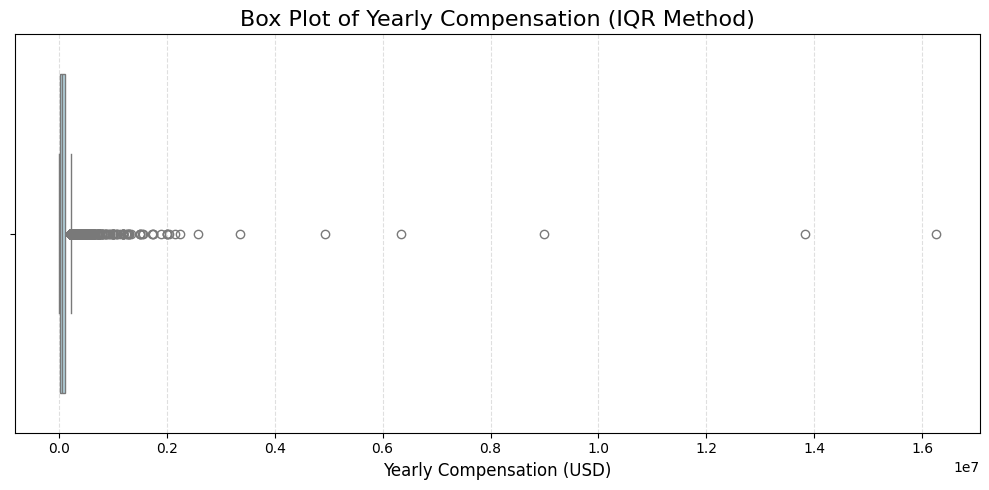

In [10]:
# Detect Outliers in Compensation using IQR

# Keep only valid numeric values
comp = df['ConvertedCompYearly'].dropna()

# Calculate Q1, Q3, and IQR
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Identify outliers
iqr_outliers = df[(df['ConvertedCompYearly'] < lower_bound) |
                  (df['ConvertedCompYearly'] > upper_bound)]

print("Number of IQR outliers:", len(iqr_outliers))

# Box plot to visualize
plt.figure(figsize=(10, 5))
sns.boxplot(x=comp, color='lightblue')
plt.title('Box Plot of Yearly Compensation (IQR Method)', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Note:

>The box plot shows that yearly compensation is highly right‑skewed. Most respondents fall within a narrow range near the lower end of the scale, while a long series of extreme high‑income values extends far to the right. These high earners appear as individual points beyond the whiskers and represent the IQR‑based outliers. The compression of the main distribution into a small area reflects how large the gap is between typical compensation and the extreme values.

The box plot looks unclear because the compensation values span an extremely wide range. Almost all respondents earn within a relatively small band near the lower end, while a long tail of very large salaries stretches far to the right. When both groups are plotted on the same axis, the dense cluster near zero becomes compressed into a thin block, and the outliers dominate the scale.

**Optional Visualization: Log‑Scaled Box Plot for Compensation**  
>This additional plot applies a log(1 + x) transformation to the yearly compensation values. The goal is to make the distribution easier to study by reducing the extreme right‑skew caused by very high salaries. This visualization is not part of the required steps but is included to help readers explore the data more clearly.


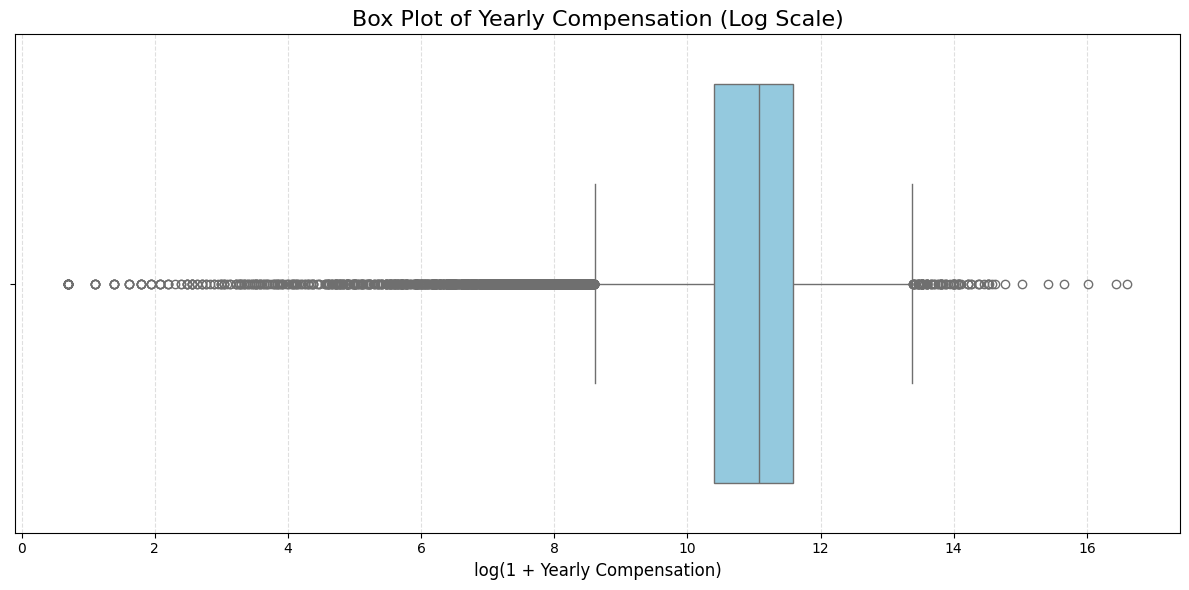

In [12]:
import numpy as np
plt.figure(figsize=(12, 6))

sns.boxplot(
    x=np.log1p(comp),   # log(1 + x) avoids issues with zeros
    color='skyblue'
)

plt.title('Box Plot of Yearly Compensation (Log Scale)', fontsize=16)
plt.xlabel('log(1 + Yearly Compensation)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


**Interpretation of the Log‑Scaled Box Plot**  
The log‑scaled box plot spreads out the compressed lower range of compensation values and makes the overall distribution easier to interpret. The median and interquartile range become clearly visible, and the high‑income outliers appear as points to the right of the whiskers. This confirms that the dataset contains a long right‑tail of extreme compensation values that are not visible in the standard linear‑scale box plot.

**Optional Visualization: Box Plot Zoomed to the Non‑Outlier Range**  
This plot focuses on the compensation values that fall within the IQR‑based non‑outlier range. By limiting the x‑axis to typical salaries, the central distribution becomes easier to examine without the distortion caused by extreme high‑income values.

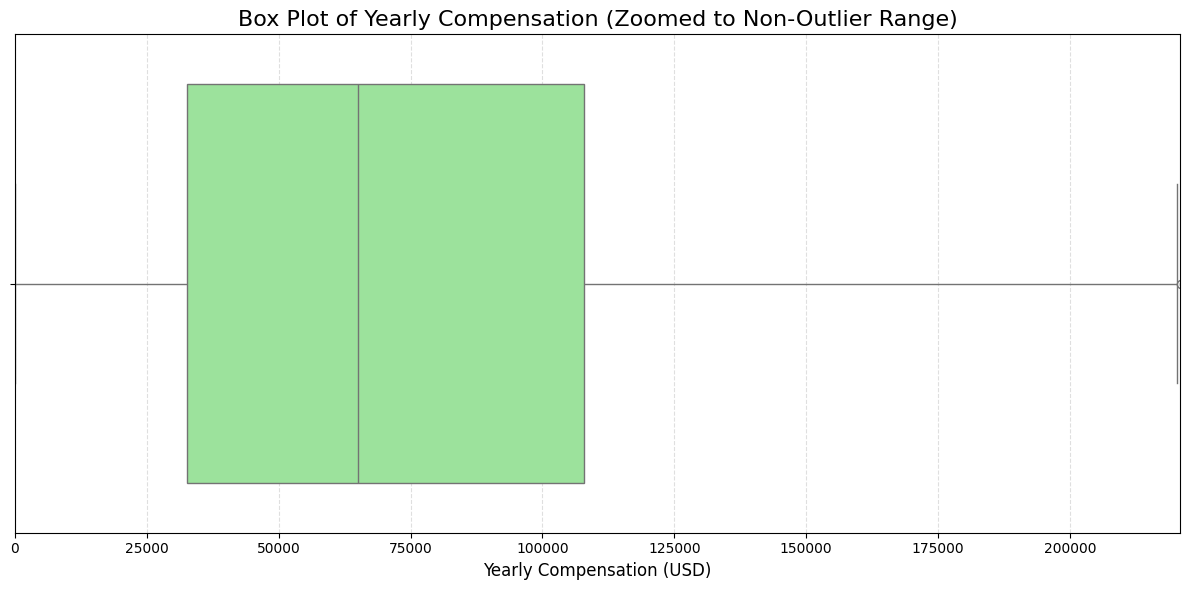

In [13]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x=comp,
    color='lightgreen'
)

plt.xlim(0, upper_bound)   # show only the IQR-based normal range
plt.title('Box Plot of Yearly Compensation (Zoomed to Non-Outlier Range)', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


#### **Interpretation of the Zoomed‑In Box Plot**  
The zoomed view highlights the typical compensation range, making the median and interquartile spread clearly visible. Removing the extreme values from the axis reveals that most respondents cluster within a relatively narrow salary band, confirming that the dataset’s skew is driven by a small number of very high earners.
A clearer, smoother version of that sentence:

>(Removing the extreme high‑income values from the axis lets the main part of the distribution expand, making it clear that most respondents fall within a relatively narrow salary range. This also shows that the overall skew in the data is caused by a small group of very high earners rather than the majority of respondents.)

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [26]:
# Create a new DataFrame without IQR-based outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) &
                    (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print("Original dataset size:", len(df))
print("Filtered dataset size (excluding outliers):", len(df_no_outliers))
print("Rows removed as outliers:", len(df) - len(df_no_outliers))


Original dataset size: 65437
Filtered dataset size (excluding outliers): 22457
Rows removed as outliers: 42980


### **Note**
>Removing 42,980 rows is completely expected for this dataset. The compensation field is extremely right‑skewed, so the IQR method flags a very large number of high‑income entries as outliers.
Most respondents fall into a relatively tight compensation range, so once the upper bound is applied, the dataset shrinks sharply. The filtered DataFrame you created is valid and ready for the remaining analysis steps.

In [18]:
# # Boolean mask: True for outliers, False for non-outliers
# iqr_mask = (df['ConvertedCompYearly'] < lower_bound) | \
#            (df['ConvertedCompYearly'] > upper_bound)

# # Remove outliers using the mask
# df_no_outliers = df[~iqr_mask]

# print("Original dataset size:", len(df))
# print("Filtered dataset size (excluding outliers):", len(df_no_outliers))
# print("Rows removed as outliers:", len(df) - len(df_no_outliers))


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


>The column still contains categories like “Prefer not to say” and “Under 18 years old”, which cannot be used directly in correlation analysis. Correlation requires numeric values, so Step 6 needs a clean numeric version of Age.

In [28]:
# # Uncomment the following to check Value couts for proper coding
# # Show the distribution of Age values
# print("\nValue counts for 'Age'(transformed):\n") 
# print(df_no_outliers['Age'].value_counts())

Correlation of Age_num with other numeric variables:

Age_num                1.000000
WorkExp                0.846986
ConvertedCompYearly    0.367714
JobSat                 0.067186
CompTotal             -0.021337
JobSatPoints_1        -0.039081
ResponseId            -0.040212
JobSatPoints_6        -0.051419
JobSatPoints_8        -0.051428
JobSatPoints_4        -0.069900
JobSatPoints_7        -0.082752
JobSatPoints_9        -0.083620
JobSatPoints_5        -0.096700
JobSatPoints_11       -0.106422
JobSatPoints_10       -0.111235
Name: Age_num, dtype: float64


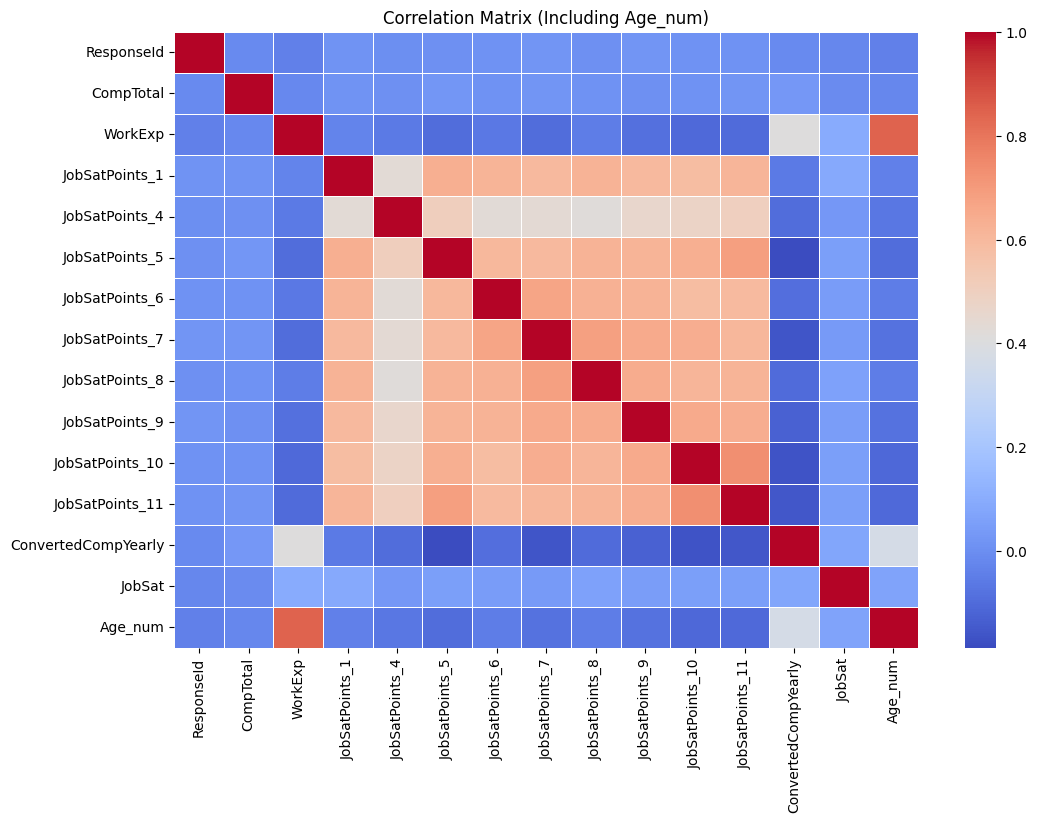

In [29]:
# Correlation Analysis

# 1. Map Age categories to approximate numeric midpoints
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

df_no_outliers['Age_num'] = df_no_outliers['Age'].map(age_map)

# Drop rows where Age cannot be mapped (e.g., "Prefer not to say")
df_no_outliers = df_no_outliers.dropna(subset=['Age_num'])

# 2. Compute correlations between Age_num and other numeric variables
numeric_cols = df_no_outliers.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Display correlations with Age_num
print("Correlation of Age_num with other numeric variables:\n")
print(corr_matrix['Age_num'].sort_values(ascending=False))

# 3. Visualize the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Including Age_num)')
plt.show()


### Interpretation of Age Correlations
Age shows a very strong positive correlation with **WorkExp**, which is expected because older respondents generally have more years of experience. There is also a moderate positive correlation with **ConvertedCompYearly**, indicating that compensation tends to increase with age, though not as strongly as experience does. The correlations with job‑satisfaction–related variables are weak and slightly negative, suggesting that age does not meaningfully influence satisfaction scores in this dataset. The remaining variables show minimal or no relationship with Age, indicating that age is not a major driver for most of the numeric fields beyond experience and compensation.

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
